
Week 4 Exercise with Numpy
Use only numpy in these exercises

Exercise 1
Open the file './befkbhalderstatkode.csv'
Turn the csv file into a numpy ndarray with np.genfromtxt(filename, delimiter=',', dtype=np.uint, skip_header=1)
Using this data:
neighb = {1: 'Indre By', 2: 'Østerbro', 3: 'Nørrebro', 4: 'Vesterbro/Kgs. Enghave', 
       5: 'Valby', 6: 'Vanløse', 7: 'Brønshøj-Husum', 8: 'Bispebjerg', 9: 'Amager Øst', 
       10: 'Amager Vest', 99: 'Udenfor'}
Find out how many people lived in each of the 11 areas in 2015
Make a bar plot to show the size of each city area from the smallest to the largest
Create a boolean mask to find out how many people above 65 years lived in Copenhagen in 2015
How many of those were from the other nordic countries (not dk)
Make a line plot showing the changes of number of people in vesterbro and østerbro from 1992 to 2015

<class 'numpy.ndarray'>  of size:  2712585
The skip_header=1 means that we have only the data

first line:
 [2015    1    0 5100  614] 
last line
 [1992   99   93 5100    1]
[[2015    1   18 5100  378]
 [2015    2   18 5100  577]
 [2015    3   18 5100  513]
 [2015    4   18 5100  309]
 [2015    5   18 5100  428]
 [2015    6   18 5100  349]
 [2015    7   18 5100  406]
 [2015    8   18 5100  339]
 [2015    9   18 5100  359]
 [2015   10   18 5100  424]
 [2015   99   18 5100   20]]
{'Indre By': 51937, 'Østerbro': 75113, 'Nørrebro': 78802, 'Vesterbro/Kgs. Enghave': 61623, 'Valby': 51727, 'Vanløse': 39537, 'Brønshøj-Husum': 43908, 'Bispebjerg': 53604, 'Amager Øst': 55205, 'Amager Vest': 64967, 'Udenfor': 3872}


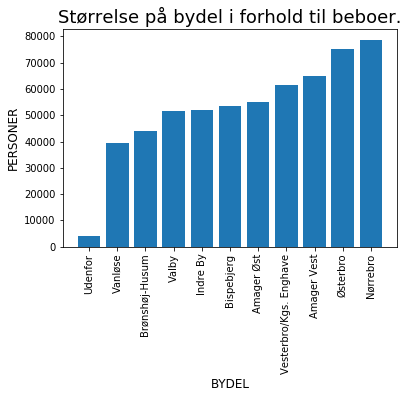

People over 65 in CPH in 2015 = 55700
People over 65 in CPH in 2015 with Finish Nationality 72
People over 65 in CPH in 2015 with Swedish Nationality 265
People over 65 in CPH in 2015 with Norsk Nationality 236
{1992: 62221, 1993: 62583, 1994: 63050, 1995: 63572, 1996: 64503, 1997: 65856, 1998: 66148, 1999: 66295, 2000: 66673, 2001: 66877, 2002: 67020, 2003: 67550, 2004: 67516, 2005: 67671, 2006: 67351, 2007: 67330, 2008: 67964, 2009: 68769, 2010: 69951, 2011: 70938, 2012: 72400, 2013: 73388, 2014: 74521, 2015: 75113}
{1992: 47854, 1993: 47589, 1994: 47538, 1995: 47633, 1996: 47734, 1997: 48275, 1998: 49109, 1999: 49520, 2000: 50312, 2001: 50756, 2002: 51039, 2003: 51045, 2004: 50869, 2005: 50643, 2006: 50303, 2007: 50964, 2008: 51466, 2009: 53351, 2010: 55315, 2011: 57150, 2012: 58411, 2013: 59211, 2014: 60328, 2015: 61623}


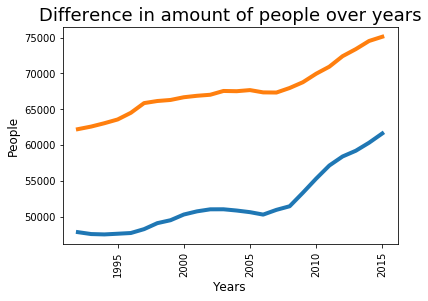

In [33]:
import numpy as np
import matplotlib.pyplot as plt

filename = './befkbhalderstatkode.csv'

bef_stats_df = np.genfromtxt(filename, delimiter=',', dtype=np.uint, skip_header=1)
print(type(bef_stats_df),' of size: ',bef_stats_df.size)
print('The skip_header=1 means that we have only the data\n\nfirst line:\n',bef_stats_df[0],'\nlast line\n',bef_stats_df[len(bef_stats_df)-1])

dd = bef_stats_df
mask = (dd[:,0] == 1998) # for all rows filter column/index = 0 to be 1998
dd[mask]

mask = (dd[:,0] == 2015) & (dd[:,2] == 18) & (dd[:,3] == 5100)
print(dd[mask])
#plt.axis([0,10,300,600])
#plt.bar(dd[:,1], dd[:,4])
np.sum(dd[mask][:,4])
#plt.show()

neighb = {1: 'Indre By', 2: 'Østerbro', 3: 'Nørrebro', 4: 'Vesterbro/Kgs. Enghave', 
          5: 'Valby', 6: 'Vanløse', 7: 'Brønshøj-Husum', 8: 'Bispebjerg', 9: 'Amager Øst', 
          10: 'Amager Vest', 99: 'Udenfor'}


def number_of_people_per_neighbourhood(n, mask):
    all_people_in_given_n = dd[mask & (dd[:,1] == n)]
    sum_of_people = all_people_in_given_n[:,4].sum() # index 4 is no of 'PERSONER'
    return sum_of_people

number_of_people_per_neighbourhood_in_2015 = {}

for x in neighb: number_of_people_per_neighbourhood_in_2015[neighb[x]] = number_of_people_per_neighbourhood(x, (dd[:,0] == 2015))

print(number_of_people_per_neighbourhood_in_2015)   

def number_of_people_per_neighbourhood_in_2015_bar():
    data = {x: y for x, y in sorted(
        number_of_people_per_neighbourhood_in_2015.items(), key=lambda i: i[1])}
    plt.figure()
    plt.bar(list(data.keys()), list(data.values()), linewidth=6)
    plt.title("Størrelse på bydel i forhold til beboer.", fontsize=18)
    plt.xlabel("BYDEL", fontsize=12)
    plt.ylabel("PERSONER", fontsize=12)
    plt.xticks(rotation=90)
    plt.show()
number_of_people_per_neighbourhood_in_2015_bar()

def people_over_65_lived_in_copenhagen_in_2015():
    mask = (dd[:,0] == 2015) & (dd[:,2] > 65) & (dd[:, 1] != 99)
    sumMask= np.sum(dd[mask][:,4])
    print("People over 65 in CPH in 2015 = " + str(sumMask))
    
    sumMaskFIN = (dd[:,3] == 5104) & (dd[:,0] == 2015) & (dd[:,2] > 65) & (dd[:, 1] != 99)
    print("People over 65 in CPH in 2015 with Finish Nationality "+str(np.sum(dd[sumMaskFIN][:,4])))
    sumMaskSWE = (dd[:,3] == 5120) & (dd[:,0] == 2015) & (dd[:,2] > 65) & (dd[:, 1] != 99)
    print("People over 65 in CPH in 2015 with Swedish Nationality "+str(np.sum(dd[sumMaskSWE][:,4])))
    sumMaskNO = (dd[:,3] == 5110) & (dd[:,0] == 2015) & (dd[:,2] > 65) & (dd[:, 1] != 99)
    print("People over 65 in CPH in 2015 with Norsk Nationality "+str(np.sum(dd[sumMaskNO][:,4])))
    
people_over_65_lived_in_copenhagen_in_2015()

amount_of_people_in_vesterbro = {}
amount_of_people_in_østerbro = {}
for x in range(1992,2016):
        amount_of_people_in_vesterbro[x] = number_of_people_per_neighbourhood(4, (dd[:,0] == x))
        amount_of_people_in_østerbro[x] = number_of_people_per_neighbourhood(2, (dd[:,0] == x))
print(amount_of_people_in_østerbro)
print(amount_of_people_in_vesterbro)

def amount_of_people_change_in_vester_and_østerbro_from_1992_to_2015():
    plt.plot(list(amount_of_people_in_vesterbro.keys()),list(amount_of_people_in_vesterbro.values()), linewidth=4, label="Vesterbro")
    plt.plot(list(amount_of_people_in_østerbro.keys()),list(amount_of_people_in_østerbro.values()), linewidth=4, label="Østerbro")
    plt.title("Difference in amount of people over years", fontsize=18)
    plt.xlabel("Years", fontsize=12)
    plt.ylabel("People", fontsize=12)
    plt.xticks(rotation=90)
    plt.show()
amount_of_people_change_in_vester_and_østerbro_from_1992_to_2015()